**FEATURE EXTRACTION**

**Aim :** To implement Local binary pattern

**Theory :**

Local Binary Pattern (LBP) is a method that used to describe texture characteristics of the surfaces. By applying LBP, texture pattern probability can be summarised into a histogram. LBP values need to be determined for all of the image pixels. Texture regularity might be determined based on the distribution shape of the LBP histogram. The implementation results of LBP on two texture types - synthetic and natural textures - shows that extracted texture feature can be used as input for pattern classification. Euclidean distance method is applied to classify the texture pattern obtained from LBPcomputation.
Local Binary Pattern (LBP) method has been usedin various applications. The LBP algorithm wasapplied to recognise human face and facialexpression . The LBP histograms are extractedfrom Gabor map of human face. These histogramsare then concatenated into a single vector. Thevector is considered as a pattern vector. In theother implementations, the combination betweenLBP texture features and a Self-Organizing Mapwere applied to identify the quality of paper .LBP is an operator for texture description thatbased on the signs of differences between neighbourpixels and central pixels . Figure 1 shows anexample of the calculation of LBP values. For eachpixel value in the image, a binary code is obtainedby thresholding its neighbourhood with the value of the centre pixel. This binary code can be consideredas a binary pattern. The neighbour pixel becomes 1if the pixel value is greater than or equal to thresholdvalue, and it becomes 0 if the pixel value is less thanthreshold. Next, the histogram will be constructed todetermine the frequency values of binary patterns.Each pattern represents possibility of binary patternfound in the image. The number of histogram binsdepends on the number of involved pixels in LBPcalculation. If LBP uses 8 pixels, the number ofhistogram bin will be 28or equal to 256

The basic version of LBP operator uses the centrepixel value as threshold to the 3×3neighbour pixels.Threshold operation will create a binary patternrepresenting texture characteristic. The equationbasic of LBP can be given as follows.LBP (xc, yc) =7Xn=02ng(In−I(xc, yc)) (1)LBP (xc, yc)is a LBP value at the centre pixel(xc, yc).Inand I(xc, yc)are the values of neighbourpixel and centre pixel respectively. Index nis theindex of neighbour pixels. The function g(x)willbe zero if x < 0and g(x) = 1 if x≥0. Forexample (see Figure 1), the centre pixel, 54, willbe selected as threshold value. The neighbour pixelsare assigned to 0 if its values are less than threshold.Conversely, it becomes 1, if the neighbour pixels aregreater or equal to the threshold. The LBP value iscomputed by applying scalar multiplication betweenthe binary and weight matrices. Finally, the sum of all multiplication results is used to represent LBPvalue.

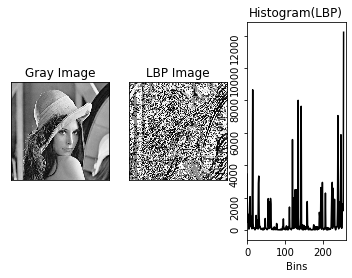

LBP Program is finished


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y): # LBP function
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()
    
def main():
  #input image
    image_file = '/content/drive/My Drive/Colab Notebooks/Imag_Processing/Images/lenna.jpg'
    img_bgr = cv2.imread(image_file)
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    img_lbp = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
             img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    output_list = []
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"        
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })    
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })

    show_output(output_list)
                             
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("LBP Program is finished")

if __name__ == '__main__':
    main()

**Benefits of LBP:**

The LBP method has already been used in a large number of applications all over the world, including visual inspection, image retrieval, remote sensing, biomedical image analysis, face image analysis, motion analysis, environment modeling, and outdoor scene analysis.





**Conclusion :** 

Hence I implemented the feature extraction method of local binary pattern. Local Binary Patterns (LBP), arguably one of the most powerful texture descriptors, and LBP variants.
